In [1]:
import numpy as np

In [3]:
data = np.loadtxt("data.csv",delimiter=",")

In [4]:
data.shape

(100, 2)

In [8]:
x = data[:,0].reshape(-1,1)
y = data[:,1]
x.shape

(100, 1)

In [9]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)

In [10]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [11]:
classifier.coef_

array([1.54033317])

In [12]:
classifier.intercept_

-1.728772741617675

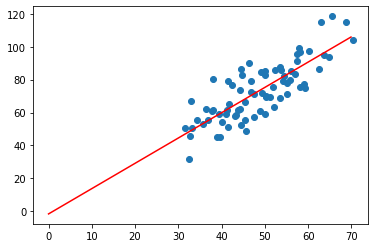

In [16]:
import matplotlib.pyplot as plt  
# y = mx+c
m = classifier.coef_[0]
c = classifier.intercept_

x_line = np.arange(0,70,0.1)
y_line = m * x_line + c
plt.plot(x_line,y_line,"r")
train_1d = x_train.reshape(75)
plt.scatter(x_train,y_train)
plt.show()

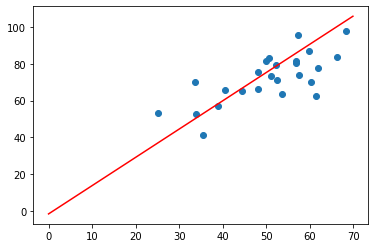

In [17]:
import matplotlib.pyplot as plt  
# y = mx+c
m = classifier.coef_[0]
c = classifier.intercept_

x_line = np.arange(0,70,0.1)
y_line = m * x_line + c
plt.plot(x_line,y_line,"r")
train_1d = x_test.reshape(25)
plt.scatter(x_test,y_test)
plt.show()